# 集成学习


## 个体与集成

**集成学习（ensemble learning）通过构建并结合多个学习器来完成学习任务**，有时也被称为多分类器系统（multi-classifier system）、基于委员会的学习（committee-based learning）。

下图显示出集成学习的一般结构：

![集成学习示意图](images/ensemblelearning/集成学习示意图.png)

- 先产生一组“个体学习器”（individual learner）；
- 再用某种策略将它们结合起来。

个体学习器通常有一个现有的学习算法从训练数据产生，例如C4.5决策树算法、BP神经网络算法等，此时集成中只包含同种类型的个体学习器。例如“决策树集成”中全是决策树，“神经网络集成”中全是神经网络，**这样的集成是“同质”的（homogeneous）。**

同质集成中的个体学习器亦称为**“基学习算法”（base learning algorithm）。**

集成也可包含不同类型的个体学习器，例如同时半酣决策树和神经网络，这样的集成是**“异质集成”（heterogeneous）**。

异质集成中的个体学习器由不同的学习算法生成，这时九不再由基学习算法；相应地，个体学习器一般不称为基学习器，常称为**“组件学习器”（component learner）**或称为个体学习器。

**集成学习通过将多个学习器进行结合，常可获得比单一学习器显著优秀的泛化性能。**

这对“弱学习器（weak learning）”尤为明显，因此集成学习的很多理论研究都是针对弱学习器进行的，而基学习器有时也被直接称为弱学习器。

> 弱学习器常指泛化性能略优于随机猜测的学习器，例如二分类问题上精度略高于50%的分类器

虽然，理论上使用弱学习器集成足以获得好的性能，但在实践中出于种种考虑，人们往往会使用比较强的学习器。

一般情况下，好坏参杂时得到的结果会比坏的好一点，好的差一点，那么集成学习是怎么获得好性能的？

事实上，集成学习中的个体学习器要“好而不同”，即个体学习器要有一定的“准确性”，不能太坏，并且要有“多样性”（diversity），即学习器间具有差异。

下面做简单的分析：

考虑二分类问题$ y \in \{ -1,+1\}$和真实函数f，假定基分类器的错误率为$\epsilon$，即对每个基分类器$h_i$有：

$P(h_i(x) \neq f(x)) = \epsilon $  ——式（1）

假设集成通过简单投票法结合T（为讨论简单，T为奇数）个基分类器，若有超过半数的基分类器正确，则集成分类就正确：

$H(x) = sign(\sum_{i=1}^{T}h_i(x))$ ——式（2）

假定基分类器的错误率为相互独立，则由Hoeffding不等式可知，集成的错误率为：

$P(H(x) \neq f(x)) = \sum_{k=0}^{\lfloor T/2 \rfloor}(_k^T)(1-\epsilon)^k \epsilon ^{T-k} \leq exp(-\frac{1}{2}T(1-2\epsilon)^2)$ ——式（3）

上式显示出，**随着集成中个体分类器数目T的增大，继承的错误率将指数级下降，最终趋向于零。**



然而我们必须注意到，**上面的分析有一个关键假设：基学习器的误差相互独立。**

在现实任务中，个体学习器是为解决同一个问题训练出来的，它们显然不可能相互独立！

事实上，个体学习器的“准确性”和“多样性”本身就存在冲突。一般的，准确性很高之后，要增加多样性就需要牺牲准确性。事实上，**如何产生并结合“好而不同”的个体学习器，恰是集成学习研究的核心。**

根据个体学习器的生成方式，目前的集成学习方法大致可以分类两类：

- 个体学习器间存在强依赖关系、必须串行生成的序列化方法；
- 个体学习器间不存在强依赖关系、可同时生成的并行化方法。

前者的代表是Boosting，后者的代表是Bagging和随机森林（Random Forest）。


## Boosting

Boosting是一组可将弱学习器提升为强学习器的算法。

这族算法的工作机制类似：

- 先从初始训练集训练出一个基学习器；
- 再根据基学习器的表现对训练样本分布进行调整，使得先前基学习器做错的训练样本在后续受到更多关注；
- 然后基于调整后的样本分布来训练下一个基学习器；
- 如此重复进行，直至基学习器数目达到事先指定的值T；
- 最终，将这T个基学习器进行加权结合。

Boosting族算法最著名的代表是AdaBoost[Freund and Schapire, 1997]，其描述如下图所示，其中$ y \in \{ -1,+1\}$，f是真实函数。

![AdaBoost算法](images/ensemblelearning/adaboost算法.PNG)


AdaBoost算法有多种推导方式，比较容易理解的是基于“加性模型”（additive model），即基学习器的线性组合：

$H(x) = \sum_{t=1}^{T}\alpha_t h_t (x)$ ——式（4）

来最小化指数损失函数（exponential loss function）[Friedman et al. 2000]：

$l_{exp}(H|D) = E_{x \sim D}[e^{-f(x)H(x)}]$ ——式（5）

> 注：$E_{x \sim D}(\centerdot)$ 的含义解释，D为概率分布，$x \sim D$可简单理解为在数据集D中进行一次随机抽样，每个样本被取到的概率；$E_{x \sim D}(\centerdot)$ 为经典的期望，可简单理解为对数据集D以概率$P(\centerdot|x)$进行加权后的期望。

由于$f(x) \in \{-1,1\}$，所以$l_{exp}(H|D) = E_{x \sim D}[e^{-f(x)H(x)}] = P(f(x) =1|x)e^{-H(x)} + P(f(x) = -1|x)e^{H(x)} $

若H(x)能令指数损失函数最小化，则考虑式（5）对H(x)的偏导：

$\frac{\partial l_{exp}(H|D)}{\partial H(x)} = - e^{-H(x)}P(f(x) = 1|x) + e^{H(x)P(f(x) = -1|x}$ ——式（6）

令式（6）为零，可解得：

$ H(x) = \frac{1}{2}ln \frac{P(f(x) = 1 |x)}{P(f(x) = - 1 |x)}$ ——式（7）

因此，有

$$
sign(H(x)) = sign( \frac{1}{2}ln \frac{P(f(x) = 1 |x)}{P(f(x) = - 1 |x)} )=
 \left \{
 \begin{matrix}
   1, P(f(x) = 1 |x) > P(f(x) = -1 |x) ;\\
   -1, P(f(x) = 1 |x) < P(f(x) = -1 |x) ;\\
  \end{matrix}
  \right . = argmax_{y \in \{-1,1\}}P(f(x) = y |x)  —— 式(8)
$$


这意味着sign(H(x))达到了贝叶斯最优错误率。

换言之，若指数函数最小化，则分类错误率也将最小化。

这说明指数损失函数式分类任务原本0/1损失函数的一致的（consistent）替代函数。

> 损失函数的知识，可参考https://www.cnblogs.com/hejunlin1992/p/8158933.html

> 公式推导问题，可以参考https://github.com/datawhalechina/pumpkin-book

由于这个替代函数有更好的数学性质，例如它是连续可微函数，因此我们呢可用它替代0/1损失函数作为优化目标。

在AdaBoost算法中，第一个基分类器$h_1$是通过直接将基学习算法用于初始数据分布而得；此后迭代生成$h_t$和$\alpha_t$基于分布$D_t$产生后，该基分类器的权重$\alpha_t$应使得$\alpha_t h_t$最小化指数损失函数：

$ l_{exp}(\alpha_t h_t|D_t) = E_{x \sim D_t}[e^{-f(x)\alpha_t h_t(x)}] \\ \quad\quad\quad\quad = E_{x \sim D_t}[e^{-f(x)\alpha_t h_t(x)}] \\ \quad\quad\quad\quad =  E_{x \sim D_t}[e^{-\alpha_t}Ⅱ(f(x) = h_t(x)) + e^{\alpha_t}Ⅱ(f(x) \neq h_t(x))]   \\ \quad\quad\quad\quad = e^{-\alpha_t}P_{x \in D_t} (f(x) = h_t(x)) +e^{\alpha_t}P_{x \in D_t} (f(x)\neq h_t(x))  \\ \quad\quad\quad\quad = e^{\alpha_t}(1-\epsilon_t) + e^{\alpha_t}\epsilon_t ,   \quad\quad\quad\quad ——式（9）$                      

其中$\epsilon_t = P_{x \in D_t}(h_t(x) \neq f(x))$。

考虑指数损失函数得导数：

$\frac{\partial l_{exp} \ \ (\alpha_t h_t|D_t)}{\partial \alpha_t} = -e^{-\alpha_t}(1 -\epsilon_t)+ e^{\alpha_t}\epsilon_t$  ——式（10）

令式（10）为零可解得：

$\alpha_t = \frac{1}{2} ln(\frac{1-\epsilon_t}{\epsilon_t})$ ——式（11）

这恰是上文中算法第6行得分类器权重更新公式。

AdaBoost算法在获得$H_{t-1}$之后样本分布将进行调整，使下一轮得基学习器$h_t$能纠正$H_{t-1}$的一些错误。理想的$h_t$能纠正$H_{t-1}$的全部错误，即最小化：

$l_{exp}(H_{t-1} +h_t|D) = E_{x \sim D}[e^{-f(x)(H_{t-1 \ }(x) + h_t(x)}]= E_{x \sim D}[e^{-f(x)H_{t-1 \ }(x)}e^{-f(x) h_t(x)}]$ ——式（12）

注意到$f^2(x) = h_t^2(x) = 1$，式（12）可使用$e^{-f(x)h_t(x)}$的泰勒展开式近似为：

$l_{exp}(H_{t-1} + h_t |D) \simeq E_{x \sim D} [e^{-f(x)H_{t-1 \ }(x)}(1-f(x)h_t(x)+\frac{f^2(x)h_t^2(x))}{2})] \\ =E_{x \sim D} [e^{-f(x)H_{t-1 \ }(x)}(1-f(x)h_t(x)+\frac{1}{2})] $  ——式（13）

> 注，泰勒公式有$e^x = 1+\frac{1}{1!}x+\frac{1}{2!}x^2 +\frac{1}{3!}x^3 +o(x^3)$

于是，理想的学习器：

$h_t(x) = argmin_h l_{exp}(H_{t-1} +h |D) \\ = argmin_h E_{x \sim D}[e^{-f(x)H_{t-1 \ }(x)}(1-f(x)h_t(x)+\frac{1}{2})] \\ = argmin_h E_{x \sim D}[e^{-f(x)H_{t-1 \ }(x)}f(x)h_t(x)] \\ = argmin_h E_{x \sim D}[\frac{e^{-f(x)H_{t-1}(x)}}{E_{x \sim D }[e^{-f(x )H_{t-1 }(x)} ]}f(x)h(x) ]$  ——式（14）

注意到$E_{x \sim D }[e^{-f(x )H_{t-1 }(x)} ]$是一个常数（因为这是前t-1个学习器的期望损失函数，其值已确定，为某个常数）。令$D_t$表示一个分布：

$D_t(x) = \frac{D(x)e^{-f(x)H_{t-1}(x)}}{E_{x \sim D }[e^{-f(x )H_{t-1 }(x)} ]}$ ——式（15）

则根据数学期望的定义，这等价于令：

$h_t(x) = argmax_h E_{x \sim D}[\frac{e^{-f(x)H_{t-1}(x)}}{ E_{x \sim D}[e^{-f(x )H_{t-1 }(x)} ]}f(x)h(x)] = argmax_h E_{x \sim D}[f(x)h(x)$ ——式（16）

> 数学期望的定义：离散型随机变量的一切可能的取值$x_i$与对应的概率$p(x_i)$乘积之和称为该离散型随机变量的数学期望$E(X) = \sum_{i=1}^N x_ip_i$.
> 对于连续型随机变量，连续性随机变量X的概率密度函数为f(x)，若积分绝对收敛，则随机变量X的数学期望 $E(X) = \int_{i=1}^{\infty}f(x)xdx$

> 在本书中，概率分布为$D(x)$，所以$E_{x \sim D}[e^{-f(x)H(x)}] = \sum_{i=1}^{|D|}D(x_i)e^{-f(x_i)H(x_i)}$

由$f(x),h(x) \in \{-1,+1\}$,有

$f(x)h(x) = 1 -2 Ⅱ(f(x) \neq h(x))$  ——式（17）

则理想的基学习器：

$h_t(x) = argmin_h E_{x \sim D_t}[Ⅱ(f(x) \neq h(x))]$  ——式（18）

由此可见，理想的$h_t$将在分布$D_t$下最小化分类误差。因此，若分类器将基于分布$D_t$来训练，且针对$D_t$的分类误差应小于0.5。

这在一定程度上类似“残差逼近”的思想。考虑到$D_t$和$D_{t+1}$的关系，有：

$D_{t+1}(x) = \frac{D(x)e^{-f(x)H_t(x)}}{E_{x \sim D}[e^{-f(x)H_t(x)}]} \\  = \frac{D(x)e^{-f(x)H_{t-1}(x)}e^{-f(x)\alpha_th_t(x)}}{E_{x \sim D}[e^{-f(x)H_t(x)}]} \\  = D_t(x) e^{-f(x)\alpha_th_t(x)} \frac{E_{x \sim D}[e^{-f(x)H_{t-1}(x)}]}{E_{x \sim D}[e^{-f(x)H_t(x)}]}$  ——式（19）

这恰是上述算法中第7行的样本分布更新公式。

于是，由式（11）和（19）可见，我们从基于加性模型迭代优化指数损失函数的角度推导出了图8.3的AdaBoost算法。

。。。

## Bagging 与随机森林

由之前的综述可知，欲得到泛化性能强的集成，集成中的个体学习器应尽可能相互独立；虽然“独立”在现实任务中无法做到，但可以设法使基学习器尽可能具有较大差异。

给定一个训练数据集，一种可能的做法是对训练样本进行采样，产生出若干个不同的子集，再从每个数据子集中训练出一个基学习器。

然而，为了活得好的集成，我们同时还希望个体学习器不能太差。如果采样出的每个子集都完全不同，则每个基学习器只用到了一小部分训练数据，甚至不足以进行有效学习，这显然无法确保产生出比较好的基学习器。

为了解决上述问题，我们可以考虑使用相互有交叠的采样子集。

### Bagging

Bagging是并行式集成学习方法最著名的代表。从名字可以看出，它基于自助采样法（bootstrap sampling）。

给定包含m个样本的数据集，我们先随机取出一个样本放入采样集中，再把样本放回初始数据集，使得下次采样时该样本仍有可能被选中，这样，经过m次随机采样操作，我们得到含m个样本的采样集，初始训练集中有的样本在采样集里多次出现，有的则从未出现。根据自助采样法中的讨论，初始训练集中约有63.2%的样本出现在采样集中。

照这样，我们可采样出T个含m个训练样本的采样集，然后基于每个采样集训练出一个基学习器，再将这些基学习器进行组合。这就是Bagging的基本流程。

再对预测输出进行结合时，Baging通常对分类任务使用简单投票法（少数服从多数),对回归任务使用简单平均法。

若分类预测时出现两个类收到同样票数的情形，则最简单的做法就是随机选择一个，也可进一步考查学习器投票的置信度来确定最终胜者。

![Bagging算法](images/ensemblelearning/Bagging算法.PNG)

假定基学习器的计算复杂度为O(m),则Bagging的复杂度大致为$T(O(m) + O(s)$，考虑到采样与投票/平均过程的复杂度$O(s)$很小，而T通常是一个不太大的常数，因此训练一个Baaging集成与直接使用基学习器算法训练一个学习器的复杂度同阶，这说明Bagging是一个很高效的集成学习算法。另外，与标准AdaBoost只适用于二分类任务不同，Bagging能不经修改的用于分类、回归任务。

值得一提的是，自助采用过程还给Bagging带来了另一个优点：由于每个基学习器只使用了初始训练集中的约63.2%的样本，剩下约36.8%的样本可用作验证集来对泛化性能进行“包外估计”（out-of-bag estimate）。为此需记录每个基学习器所使用的训练样本。


.
。。。..

### 随机森林

随机森林（Random Forest）是Bagging的一个扩展变体。RF在以决策树为基学习器构建Bagging集成的基础上，进一步在决策树的训练过程中引入了随机属性选择。

具体来说，传统决策树在选择划分属性时是在当前节点的属性集合（假定有d个属性）中选择一个最优属性；

而在RF中，对基决策树的每个节点，先从该节点的属性集合中随机选择一个包含k个属性的子集，然后再从这个子集中选择一个最优属性用于划分。这里的参数k控制了随机性的引入程度：若令k = d，则及决策树的构建与传统决策树相同；若令k=1，则是随机选择一个属性用于划分；一般情况下，推荐$k=log_2d$。

随机森林简单、容易实现、计算开销小，令人惊奇的是，它在很多现实任务中展现出强大的学习性能，被誉为“代表集成学习技术水平的方法”。

可以看出，随机森林对Bagging只做了小改动，但是与Bagging中基学习器的“多样性”仅通过样本扰动（对初始训练集采样）而不同，随机森林中基学习器不仅来自样本扰动，还来自属性扰动，这就使得最终集成的泛化性能可通过个体学习器之间的差异度的增加而进一步提升。

随机森林的收敛性与Bagging相似。下图所示，随机森林的起始性能往往相对较差，特别是集成中只包含一个基学习器时。

![在两个UCI数据上集成规模对随机森林与Bagging的影响](images/ensemblelearning/在两个UCI数据上集成规模对随机森林与Bagging的影响.PNG)

这很容易理解，因为通过引入属性扰动，随机森林中个体学习器的性能往往有所降低。然而，随着个体学习器数目的增加，随机森林通常会收敛到更低的泛化误差。值得一提的是，随机森林的训练效率常优于Bagging，因此在个体决策树的构建过程中，Bagging使用的是“确定性”决策树，在选择划分属性时要对结点的所有属性进行考察，而随机网络使用的是“随机性”决策树，则只需考察一个属性的子集。

### 利用sklearn中的集成学习模型完成预测

sklearn中通常会区分两类集合方法：

- 平均型方法，基本动机是构建几个相互独立的预测器，然后平均化其预测结果。平均而言，组合估计通常优于任何单基估计，因为其方差减小。

  + 示例： 套袋方法，随机树木的森林，......

- 增强型方法，基本动机是结合几个弱模型来产生强大的整体。基学习器是顺序构建的，人们试图减少组合学习器的偏差。

  + 示例： AdaBoost，Gradient Tree Boosting，......
  
  

#### Bagging


在scikit-learn中，Bagging方法使用统一的 BaggingClassifier 或BaggingRegressor 元估计器。

参数有：

- 用户指定的基学习器
- 样本随机子集划分策略
  + max_samples 用于指定子集中样本量的大小
  + max_features 用于指定子集中的属性数
  + bootstrap 用于控制样本
- ，同时指定绘制随机子集的策略的参数。特别是，max_samples 和max_features控制所述子集的大小（在样品和特征而言），而bootstrap和bootstrap_features控制是否样本和特征有或没有替换绘制。当使用可用样本的子集时，可以通过设置来使用袋外样本来估计泛化精度oob_score=True。例如，下面的代码片段说明了如何实例化KNeighborsClassifier基本估算器的套袋集合 ，每个估算器都建立在50％样本和50％特征的随机子集上。

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5) #使用50%的样本 50%的属性作为随机子集
bagging

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

### 随机森林

sklearn中有两种基于随机化决策树的平均化算法：

- 随机森林算法RandomForest
- Extra-Trees算法

scikit-learn实现通过平均其概率预测来组合分类器，而不是让每个分类器对单个类别进行投票。

In [9]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### AdaBoostClassifier

下面的例子使用了100个弱学习器，构建强的集成学习器。

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores.mean()     

0.9466666666666665

XGBoost是boosting算法的其中一种。Boosting算法的思想是将许多弱分类器集成在一起形成一个强分类器。因为XGBoost是一种提升树模型，所以它是将许多树模型集成在一起，形成一个很强的分类器。而所用到的树模型则是CART回归树模型。讲解其原理前，先讲解一下CART回归树。

该算法思想就是不断地添加树，不断地进行特征分裂来生长一棵树，每次添加一个树，其实是学习一个新函数，去拟合上次预测的残差。当我们训练完成得到k棵树，我们要预测一个样本的分数，其实就是根据这个样本的特征，在每棵树中会落到对应的一个叶子节点，每个叶子节点就对应一个分数，最后只需要将每棵树对应的分数加起来就是该样本的预测值。



In [11]:
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)

ModuleNotFoundError: No module named 'xgboost'

base_estimator：就是用来提升的基学习器，默认是决策树，也可以用其他的学习器，但是要支持样本权重，以及有classes_和n_classes_这些特征 
learning_rate:这个到后面还会讲一下，主要就是按照原来的AdaBoost算法，在每一轮我们得到一个新的学习器以及它的权重，但是不是直接就加上原来的总的学习器，还要在乘以一个learning_rate，就是减少新的学习器的贡献，这种做法叫做shrink。较小的learning_rate确实可以减小最终的误差，但是它比较小的话，学习也比较慢，那么总的学习器个数就需要比较大,因此learning_rate和n_eatimators之间关系比较强 
algorithm：只有两种算法SAMME和SAMME.R。说实话两者具体有什么差别我也不是很清楚，其中SAMME就是我在上一篇中讲的基本的AdaBoost的算法，SAMME.R中的R代表的probability，它使用概率估计来更新加性模型（就是总的那个把基本学习器加起来的模型）。总之最后SAMME.R算法能够得到更小的测试误差以及更快的收敛速度。

函数 
decision_function计算输入数据的决策函数，返回的其实是一个array，大小为shape=[n_samples, k]。对于二分类问题，k==1，这时候输出的score数值分别靠近-1或者1代表样本可能是第一类或者第二类。如果不是而分类，那么k==n_classes.


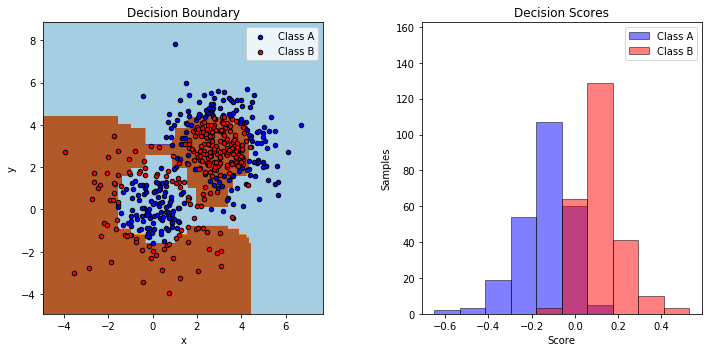

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
n_samples=200, n_features=2,
n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
n_samples=300, n_features=2,
n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
#将产生的两个样本集合连在一起，形成总的数据集
y = np.concatenate((y1, - y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",
n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
#上面依然是很常见的画图步骤，画出的是决策平面

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    #得到第i类的点的索引
    plt.scatter(X[idx, 0], X[idx, 1],
        c=c, cmap=plt.cm.Paired,
        s=20, edgecolor='k',
        label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
        bins=10,
        range=plot_range,
        facecolor=c,
        label='Class %s' % n,
        alpha=.5,
        edgecolor='k')
x1, x2, y1, y2 = plt.axis()
#上面这是将两类点的决策函数值画成的直方图画在了一张图里面。
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

上图是最终的结果，左边是决策平面和数据点，右边是决策函数的值所画成的直方图，数值大于0的被判定成B类，小于0的被判定成A类。可以看到有一些点在0到正负0.2之间是被判定错误的。至于分数为0的我理解是在边界上的点，就像SVM里面，决策平面上的点的决策函数为0.

Gradient Boosting
梯度提升回归树（GBRT）

Shrinkage即为将learning_rate设为小于1.0大于0的数，从图中可以看出进行shrinkage之后误差有所减小。 
所谓的shrinkage算法就是上面最后得到的更新公式中，降低每次决策树的贡献 
fm(x)=fm−1(x)+ν∑j=1JmγjmI(x∈Rjm)(12)
fm(x)=fm−1(x)+ν∑j=1JmγjmI(x∈Rjm)(12)

其中0<ν<10<ν<1，νν越小代表每次学习的越慢，所以需要越大的总学习器个数M，或者叫循环个数，但是M太大可能影响计算速度，所以每个小的决策树需要尽量小。比较好的策略是，选择非常小的νν，然后通过早停决定M。
Subsample是指每次训练新的决策树的时候，只取一部分的训练数据进行训练，通常取0.5或者更少，这种方式不仅能够加快训练速度，还能够提高准确度。从上图就能看到，进行shrinkage和subsample的线是最低的。

max_features是指决策树每次分割的时候考虑的特征个数，可以是整数，就是具体考虑几个特征，也可以是其他比如”sqrt”“log2”，都是对n_features求的，比如sqrt(n_features)。max_features < n_features可以减小方差但是提高了偏差。其实它和subsample都是在一定程度上引入了多样性，使得各个基学习器之间的独立性更大。所以max_features < n_features也能减小一定的误差，但是从图中可以看出并不明显。

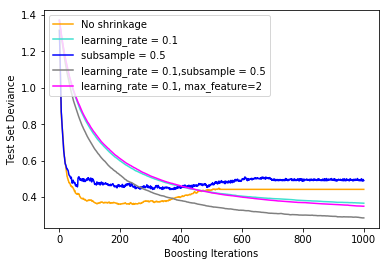

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets

X, y = datasets.make_hastie_10_2(n_samples = 12000, random_state = 1)
#产生数据的函数，例子是hastie 的《统计学习基础》的example 10.2
X = X.astype(np.float32)
labels,y = np.unique(y, return_inverse = True)
#np.unique返回不同的数值，这里就是类别，return_inverse = True的话，还返回原来的数据对应的
#类别的编号
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]
#划分训练集和测试集
original_params = {'n_estimators':1000, 'max_leaf_nodes':4, 'max_depth':None,
                  'random_state':2, 'min_samples_split':5}

#上面是原始的参数，下面可以更改 'max_leaf_nodes'即代表每个树的最大叶节点                 

plt.figure()
for label, color, setting in [('No shrinkage', 'orange', {'learning_rate':1.0, 'subsample':1.0}),
                             ('learning_rate = 0.1','turquoise',{'learning_rate':0.1, 'subsample':1.0}),
                             ('subsample = 0.5','blue',{'learning_rate':1.0, 'subsample':0.5}),
                             ('learning_rate = 0.1,subsample = 0.5','gray',{'learning_rate':0.1, 'subsample':0.5}),
                             ('learning_rate = 0.1, max_feature=2', 'magenta',{'learning_rate':0.1,'max_features':2})]:
    params = dict(original_params)
    params.update(setting)
    #更新参数
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    #声明分类器并训练
    test_deviance = np.zeros((params['n_estimators'],), dtype = np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        test_deviance[i] =clf.loss_(y_test, y_pred)
     #在每一轮训练中计算误差   staged_decision_function计算每一轮的决策函数，返回的是一个
     #数组的生成器，大小为shape = [n_samples, n_features]

    plt.plot((np.arange(test_deviance.shape[0])+1), test_deviance,'-', color = color, label = label)
plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')
plt.show()

DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with 30 estimators with features [0, 1] has a score of 0.9266666666666666


D:\pythonspace\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


ExtraTrees with 30 estimators with features [0, 1] has a score of 0.9266666666666666


D:\pythonspace\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


AdaBoost with 30 estimators with features [0, 1] has a score of 0.84


D:\pythonspace\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [0, 2] has a score of 0.9933333333333333


D:\pythonspace\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\pythonspace\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


ExtraTrees with 30 estimators with features [0, 2] has a score of 0.9933333333333333


D:\pythonspace\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


AdaBoost with 30 estimators with features [0, 2] has a score of 0.9933333333333333


D:\pythonspace\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.9933333333333333


D:\pythonspace\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\pythonspace\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


ExtraTrees with 30 estimators with features [2, 3] has a score of 0.9933333333333333


D:\pythonspace\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


AdaBoost with 30 estimators with features [2, 3] has a score of 0.9933333333333333


D:\pythonspace\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


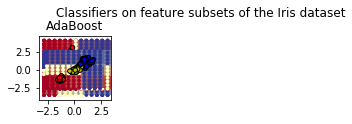

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02 # fine step width for decision surface contours
plot_step_coarser = 0.5 # step widths for coarse classifier guesses
RANDOM_SEED = 13 # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
RandomForestClassifier(n_estimators=n_estimators),
ExtraTreesClassifier(n_estimators=n_estimators),
AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
n_estimators=n_estimators)]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
# We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target
#选择不同的特征
        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        #把数据随机打散
# Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        #按照正态分布归一化
# Train
        clf = clone(model)
        #这一步好像没啥作用，删了结果也是对的
        clf = model.fit(X, y)
        #拟合模型
        scores = clf.score(X, y)
        #得出分数
# Create a title for each column and the console by using str() and
# slicing away useless parts of the string
        model_title = str(type(model)).split(
        ".")[-1][:-2][:-len("Classifier")]
        #这一步是在处理字符串，把classifier的名字提取出来
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
            "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
        # Add a title at the top of each column
            plt.title(model_title)

# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
            np.arange(y_min, y_max, plot_step))
#上面这还是老套路，画网格
# Plot either a single DecisionTreeClassifier or alpha blend the
# decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
# Choose alpha blend level with respect to the number
# of estimators
# that are in use (noting that AdaBoost can use fewer estimators
# than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

# Build a coarser grid to plot a set of ensemble classifications
# to show how these are different to what we see in the decision
# surfaces. These points are regularly space and do not have a
# black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
            yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
            c=Z_points_coarser, cmap=cmap, edgecolors="none")
#画粗网格
# Plot the training points, these are clustered together and have a
# black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['r', 'y', 'b']),
            edgecolor='k', s=20)
plot_idx += 1 # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset")
plt.axis("tight")

plt.show()